In [4]:
leaf_file='/home/ar/Projects/nasiri/all_data/data.leaf.txt'
bud_file='/home/ar/Projects/nasiri/all_data/data.buds.txt'

In [5]:
import pandas as pd

In [13]:
leaf_all = pd.read_csv(leaf_file,sep='\t')
buds_all = pd.read_csv(bud_file,sep='\t')

In [14]:
leaf_col_names = leaf_all.columns
leaf_names = leaf_all['name']
leaf_y = leaf_all['exp']
leaf_x = leaf_all[leaf_col_names[1:-1]]


In [15]:
buds_col_names = buds_all.columns
buds_names = buds_all['name']
buds_y = buds_all['exp']
buds_x = buds_all[buds_col_names[1:-1]]

In [20]:
from random import shuffle

leaf_gene_cnt = leaf_x.shape[0]
leaf_gene_cnt
indices = [i for i in range(leaf_gene_cnt)]
shuffle(indices)

In [47]:
from math import ceil

num_folds = 10
fold_size = ceil(leaf_gene_cnt/num_folds)

boundaries = [i for i in range(0,leaf_gene_cnt,fold_size)]
boundaries.append(leaf_gene_cnt)

test_indices = []
train_indices = []
for i in range(len(boundaries)-1):
    test_indices.append([indices[j] for j in range(boundaries[i],boundaries[i+1])])
    train_indices.append(list(set(indices)-set(test_indices[i])))


In [72]:
from sklearn.ensemble import RandomForestRegressor

tests = []
predictions = []

for fold in range(num_folds):
    print('fold %d...' % fold)
    x_train = leaf_x.loc[train_indices[fold], :]
    y_train = leaf_y.loc[train_indices[fold]]

    x_test = leaf_x.loc[test_indices[fold], :]
    y_test = leaf_y.loc[test_indices[fold]]
    
    rfm = RandomForestRegressor()
    rfm = rfm.fit(x_train, y_train)
    predicted = rfm.predict(x_test)
    predictions.append(predicted)
    tests.append(y_test)

fold 0...
fold 1...
fold 2...
fold 3...
fold 4...
fold 5...
fold 6...
fold 7...
fold 8...
fold 9...


In [77]:
import numpy as np

for fold in range(num_folds):
    cc = np.corrcoef(predictions[fold], tests[fold])
    print('fold %d: %f' % (fold, cc[0][1]))

fold 0: 0.215622
fold 1: 0.236165
fold 2: 0.192545
fold 3: 0.238554
fold 4: 0.163640
fold 5: 0.244566
fold 6: 0.139783
fold 7: 0.337225
fold 8: 0.191191
fold 9: 0.247387


In [87]:
all_tests = pd.concat(tests)
all_predictions = np.concatenate(predictions)

cc = np.corrcoef(all_tests, all_predictions)
print('total: %f' % cc[0,1])

total: 0.201359


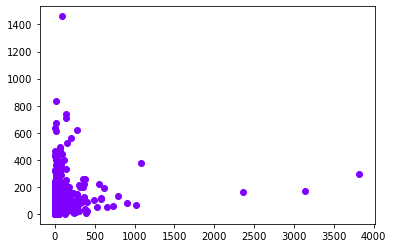

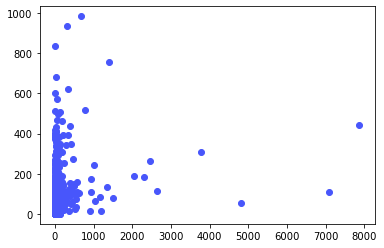

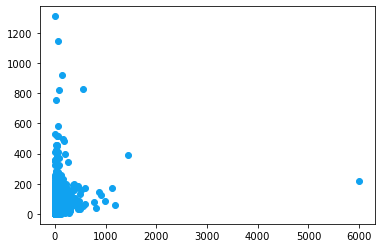

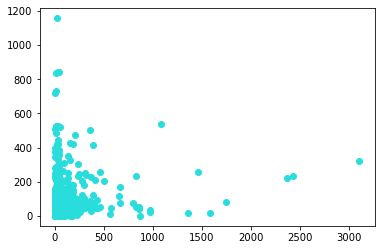

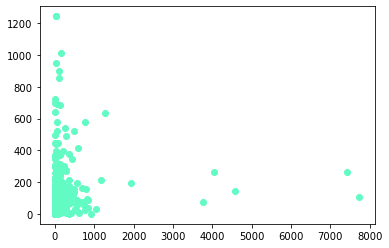

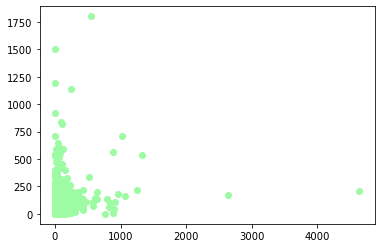

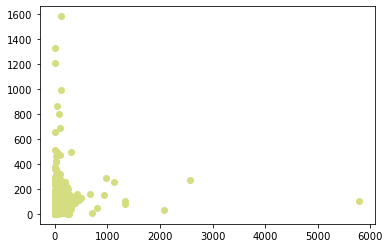

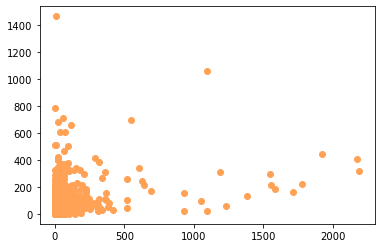

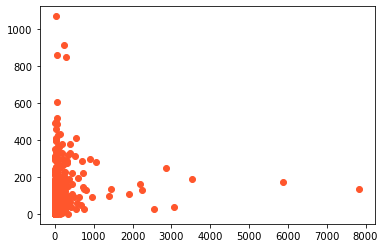

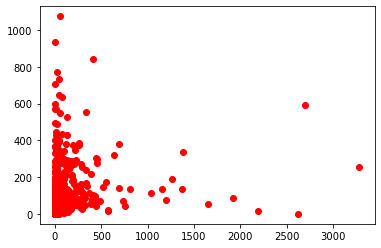

In [90]:
from matplotlib import pyplot as plt
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, num_folds))

for fold in range(num_folds):
    plt.scatter(tests[fold], predictions[fold], color=colors[fold])
    plt.show()

In [97]:
from scipy.stats import spearmanr

for fold in range(num_folds):
    ss = spearmanr(predictions[fold], tests[fold])
    print('spearman, fold %d: %f' % (fold, ss.correlation))

s = spearmanr(all_tests, all_predictions)
print('total spearman: %f' % s.correlation)

spearman, fold 0: 0.685562
spearman, fold 1: 0.702912
spearman, fold 2: 0.700395
spearman, fold 3: 0.703522
spearman, fold 4: 0.718355
spearman, fold 5: 0.714564
spearman, fold 6: 0.691748
spearman, fold 7: 0.662448
spearman, fold 8: 0.706599
spearman, fold 9: 0.701963
total spearman: 0.699113


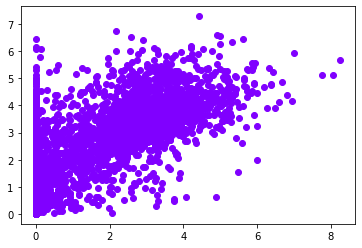

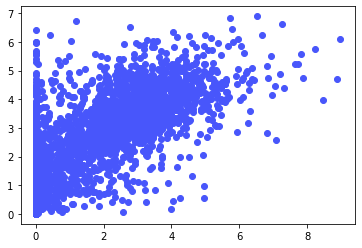

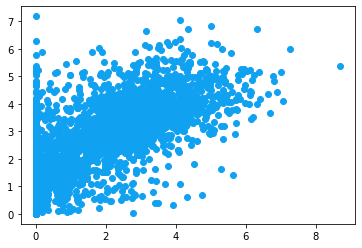

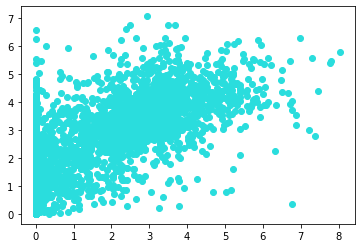

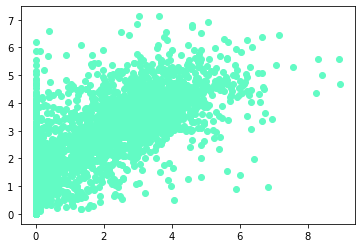

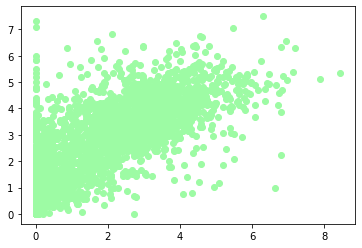

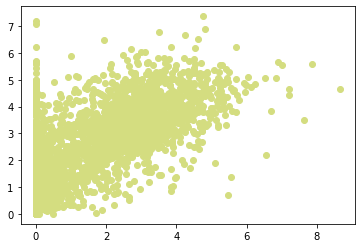

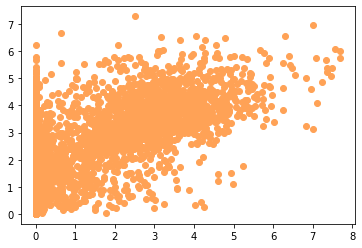

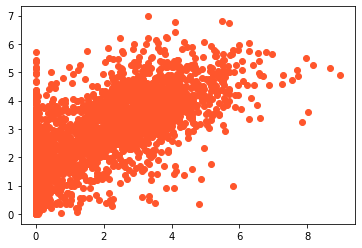

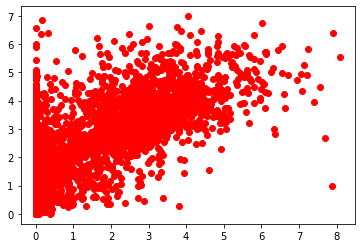

In [100]:
colors = cm.rainbow(np.linspace(0, 1, num_folds))

for fold in range(num_folds):
    plt.scatter(np.log(1+tests[fold]), np.log(1+predictions[fold]), color=colors[fold])
    plt.show()

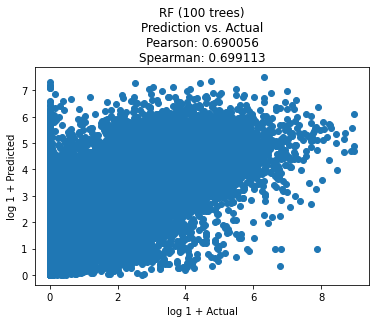

In [105]:
cc = np.corrcoef(np.log(1+all_tests), np.log(1+all_predictions))
ss = spearmanr(all_tests, all_predictions)

plt.scatter(np.log(1+all_tests), np.log(1+all_predictions))
plt.xlabel('log 1 + Actual')
plt.ylabel('log 1 + Predicted')
plt.title('RF (100 trees)\nPrediction vs. Actual\nPearson: %f\nSpearman: %f' % (cc[0,1], ss.correlation))
plt.show()

In [112]:
from sklearn.ensemble import RandomForestClassifier

fold = 0
x_train = leaf_x.loc[train_indices[fold], :]
y_train = leaf_y.loc[train_indices[fold]]
y_train[y_train != 0] = 1


x_test = leaf_x.loc[test_indices[fold], :]
y_test = leaf_y.loc[test_indices[fold]]
y_test[y_test != 0] = 1


rfm = RandomForestClassifier()
rfm = rfm.fit(x_train, y_train)
predicted = rfm.predict(x_test)

In [116]:
y_test_0_cnt = sum(y_test == 0)
y_test_1_cnt = sum(y_test == 1)

predicted_0_cnt = sum(predicted == 0)
predicted_1_cnt = sum(predicted == 1)

disc = sum(predicted != y_test)
agre = sum(predicted == y_test)

print('y0: %d, y1: %d\np0: %d, p1: %d\nagreement: %d, discrepancy: %d' % (y_test_0_cnt, y_test_1_cnt, predicted_0_cnt, predicted_1_cnt, agre, disc))

y0: 479, y1: 2237
p0: 346, p1: 2370
agreement: 2417, discrepancy: 299
